In [234]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('redfin_cleaned_stage_1.csv', low_memory = False)

In [236]:
na_count = df.isna().sum()

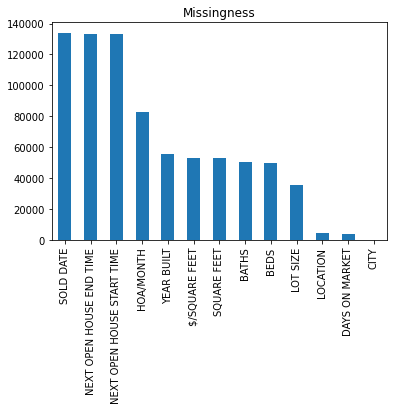

In [283]:
na_count.sort_values(ascending=False).head(13).plot.bar();
plt.title('Missingness');

In [238]:
df = df.drop(['SOLD DATE','NEXT OPEN HOUSE END TIME','NEXT OPEN HOUSE START TIME','HOA/MONTH',
             'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'],axis=1)

In [239]:
df['BEDS'] = df['BEDS'].astype(str)

In [252]:
df.BEDS = df.BEDS.dropna()
df = df[df.BEDS != 'nan']
df['BEDS'] = df['BEDS'].astype(float)
df['BEDS'] = df['BEDS'].astype(int)
df = df[df.BEDS < 12]

In [281]:
# df.BEDS.value_counts()

In [259]:
df['BATHS'] = df['BATHS'].astype(str)
df.BATHS = df.BATHS.dropna()
df = df[df.BATHS != 'nan']
df['BATHS'] = df['BATHS'].astype(float)
df['BATHS'] = df['BATHS'].astype(int)
df = df[df.BATHS < 10]

In [272]:
categorical_a = df[['BATHS','BEDS','STATE OR PROVINCE','PROPERTY TYPE']]

myVars = df[['Unnamed: 0', 'SALE TYPE', 'PROPERTY TYPE', 'ADDRESS',
       'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS',
       'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'STATUS',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
       'zip']]

In [299]:
df['YEAR BUILT'] = df['YEAR BUILT'].astype(str)
df['YEAR BUILT'] = df['YEAR BUILT'].dropna()
df = df[df['YEAR BUILT'] != 'nan']
df['YEAR BUILT'] = df['YEAR BUILT'].astype(float)
df['YEAR BUILT'] = df['YEAR BUILT'].astype(int)
df = df[df['YEAR BUILT'] > 1990]

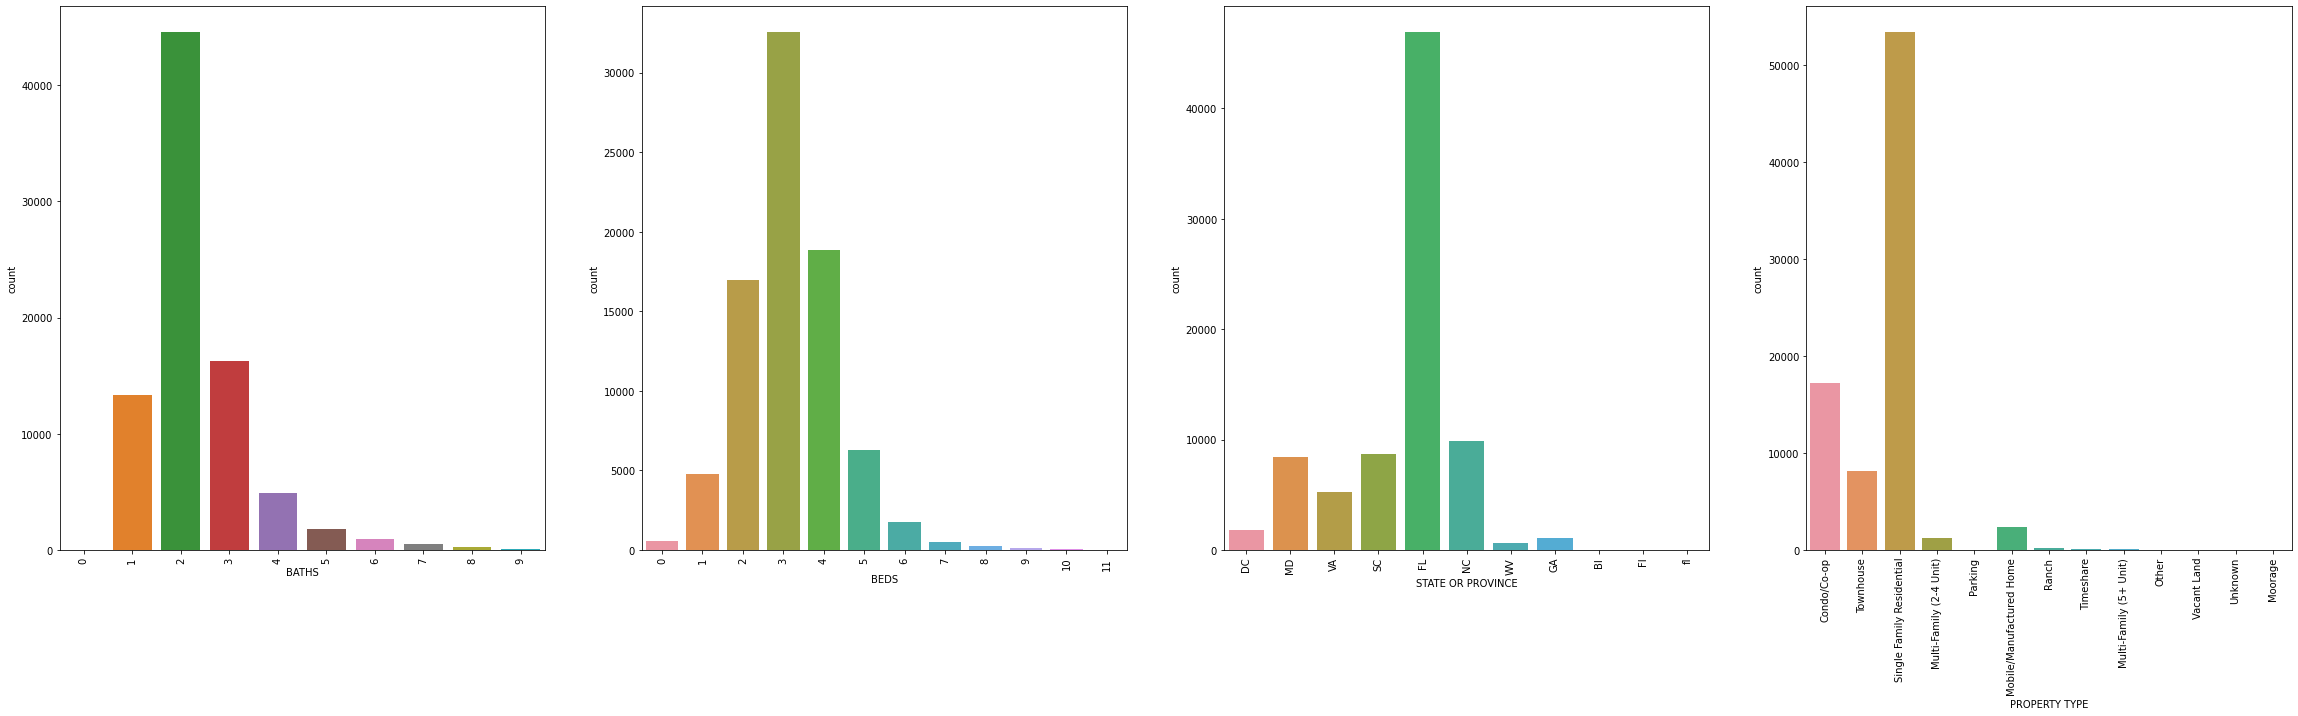

In [300]:
fig, ax = plt.subplots(1, 4, figsize=(40, 10))
for variable, subplot in zip(categorical_a, ax.flatten()):
    sns.countplot(x=myVars[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

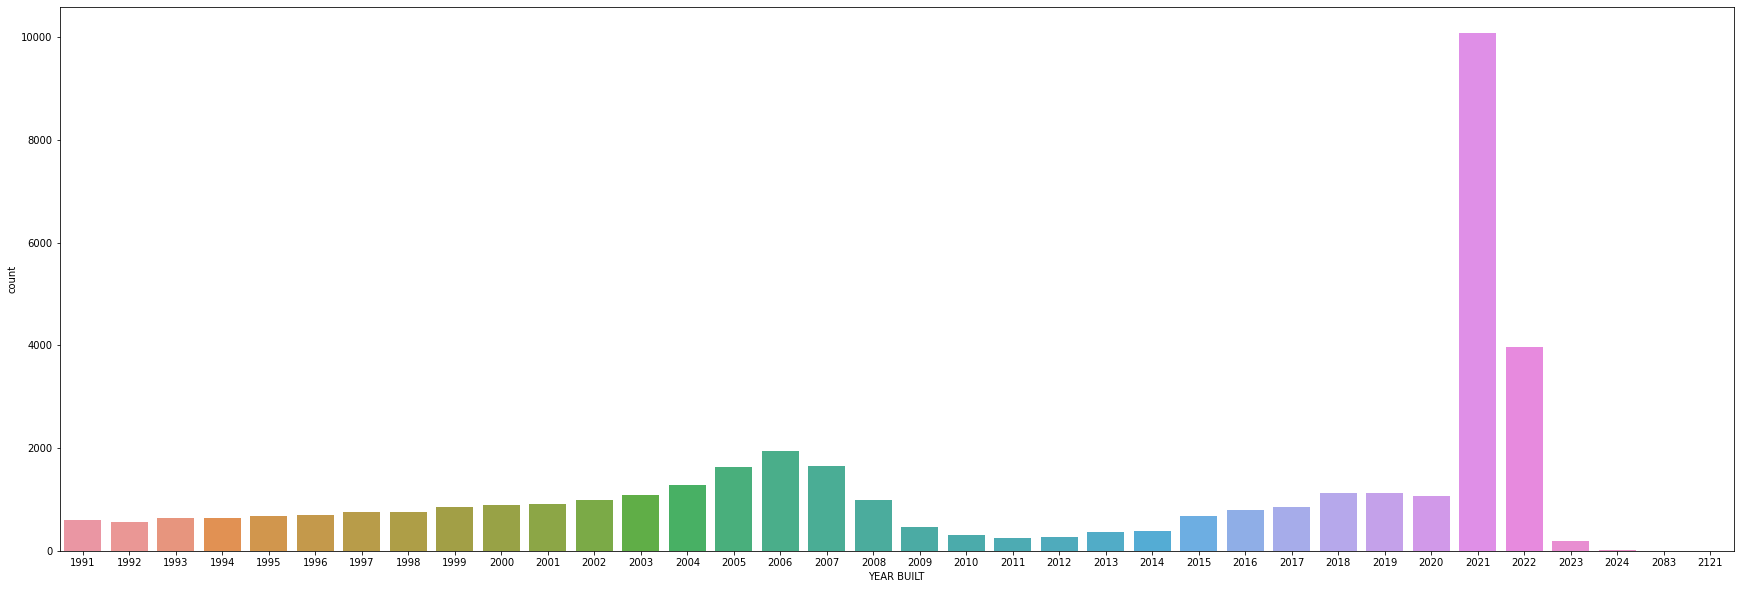

In [301]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x="YEAR BUILT", data=df)